In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

In [2]:
# Read Zillow Data - full dataset

df = pd.read_csv("../Resources/ZILLOW_DATA.csv")

In [3]:
# Read Regions dataset

dfRegions = pd.read_csv("../Resources/ZILLOW_REGIONS.csv")


In [64]:
dfIndicators = pd.read_csv("../Resources/ZILLOW_INDICATORS.csv")

In [4]:

print("\nThere are no missing regions:\n",dfRegions.info())
print("\nHere's the count of unique region columns:\n",dfRegions.nunique())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89305 entries, 0 to 89304
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   region_id    89305 non-null  int64 
 1   region_type  89305 non-null  object
 2   region       89305 non-null  object
dtypes: int64(1), object(2)
memory usage: 2.0+ MB

There are no missing regions:
 None

Here's the count of unique region columns:
 region_id      89305
region_type        6
region         89295
dtype: int64


In [5]:

print("Here are the top 5 rows of the dataframe:\n",df.head())
print("\nHere are the columns with missing data:\n",df.info())
print("\nHere's the count of unique values in the dataset:\n",df.nunique())

Here are the top 5 rows of the dataframe:
   indicator_id  region_id        date     value
0         ZATT       3101  1998-01-31  338849.0
1         ZATT       3101  1998-02-28  342993.0
2         ZATT       3101  1998-03-31  346763.0
3         ZATT       3101  1998-04-30  349356.0
4         ZATT       3101  1998-05-31  351981.0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151555917 entries, 0 to 151555916
Data columns (total 4 columns):
 #   Column        Dtype  
---  ------        -----  
 0   indicator_id  object 
 1   region_id     int64  
 2   date          object 
 3   value         float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.5+ GB

Here are the columns with missing data:
 None

Here's the count of unique values in the dataset:
 indicator_id          56
region_id          89305
date                1129
value           82293706
dtype: int64


In [6]:
print("There are no null values:\n",df.isnull().sum())
print("\nHere are the row and column counts for the data:",df.shape)

There are no null values:
 indicator_id    0
region_id       0
date            0
value           0
dtype: int64

Here are the row and column counts for the data: (151555917, 4)


In [7]:
print(df['date'].min())
print(df['date'].max())

1996-01-31
2023-11-04


In [8]:
dfRegions.head()

,region_id,region_type,region
0,394401,metro,"Boone, IA; IA"
1,274772,neigh,Northeast Dallas; TX; Dallas-Fort Worth-Arling...
2,273698,neigh,"Far North; TX; Dallas-Fort Worth-Arlington, TX..."
3,275473,neigh,Southeast Dallas; TX; Dallas-Fort Worth-Arling...
4,9,state,California


In [9]:
# Filter Regions dataframe for region_type = 'zip'

dfRegions=dfRegions.loc[dfRegions['region_type']=='zip',:]

# Create 'zip' column by spliting 'region' column and extracting zip
dfRegions['zip']=dfRegions['region'].str.split(';',n=1,expand=True)[0]

dfRegions.head(25)

,region_id,region_type,region,zip
9,58011,zip,00612; MI; Crawford County; Frederic,00612
13,58051,zip,00693; PA; Pittsburgh; Westmoreland County; Gr...,00693
17,58109,zip,00795; AL; Auburn-Opelika; Lee County; Juana Diaz,00795
23,58129,zip,00907; AR; Forrest City; Saint Francis County;...,00907
91,92526,zip,"78584; TX; Rio Grande City-Roma, TX; Starr County",78584
265,58004,zip,00602; AL; Auburn-Opelika; Lee County; Auburn,00602
269,62298,zip,"11951; NY; New York-Newark-Jersey City, NY-NJ-...",11951
455,94610,zip,84627; UT; Sanpete County; Ephraim,84627
534,89510,zip,"72370; AR; Blytheville, AR; Mississippi County...",72370
628,83982,zip,59255; MT; Roosevelt County; Poplar,59255


In [10]:
# Create 'state' column by spliting 'region' column and extracting stage
dfRegions['state']=dfRegions['region'].str.split(';',n=1,expand=True)[1].str.split(';',n=1,expand=True)[0].str.strip(' ')
dfRegions.head()

,region_id,region_type,region,zip,state
9,58011,zip,00612; MI; Crawford County; Frederic,00612,MI
13,58051,zip,00693; PA; Pittsburgh; Westmoreland County; Gr...,00693,PA
17,58109,zip,00795; AL; Auburn-Opelika; Lee County; Juana Diaz,00795,AL
23,58129,zip,00907; AR; Forrest City; Saint Francis County;...,00907,AR
91,92526,zip,"78584; TX; Rio Grande City-Roma, TX; Starr County",78584,TX


In [11]:
# Define the state that we want to run the analysis
state = 'OK'

# Filter regions dataframe to select state = OK

dfRegions=dfRegions.loc[dfRegions['state']==state,:]
dfRegions.count()

region_id      642
region_type    642
region         642
zip            642
state          642
dtype: int64

In [12]:
print(df.head())
print(dfRegions.head())

  indicator_id  region_id        date     value
0         ZATT       3101  1998-01-31  338849.0
1         ZATT       3101  1998-02-28  342993.0
2         ZATT       3101  1998-03-31  346763.0
3         ZATT       3101  1998-04-30  349356.0
4         ZATT       3101  1998-05-31  351981.0
      region_id region_type                                   region    zip  \
1392      90431         zip   74502; OK; McAlester; Pittsburg County  74502   
1538      90530         zip  74802; OK; Shawnee; Pottawatomie County  74802   
1574      90422         zip    74465; OK; Tahlequah; Cherokee County  74465   
1593      90100         zip    73624; OK; Washita County; Burns Flat  73624   
1629      90532         zip     74818; OK; Seminole County; Seminole  74818   

     state  
1392    OK  
1538    OK  
1574    OK  
1593    OK  
1629    OK  


In [13]:
print(df.dtypes)
print('-------')
print(dfRegions.dtypes)
print(df.shape)
print(dfRegions.shape)

indicator_id     object
region_id         int64
date             object
value           float64
dtype: object
-------
region_id       int64
region_type    object
region         object
zip            object
state          object
dtype: object
(151555917, 4)
(642, 5)


In [14]:
# Merge main zillow dataframe with regions dataframe on region id

dfValue=pd.merge(df,dfRegions,on="region_id", how="inner")

print(dfValue.head())
print(dfValue.count())


  indicator_id  region_id        date          value region_type  \
0         ZSFH      89925  2000-01-31  104420.426693         zip   
1         ZSFH      89925  1996-01-31   84158.000000         zip   
2         ZSFH      89925  1996-02-29   84299.000000         zip   
3         ZSFH      89925  1996-03-31   84424.000000         zip   
4         ZSFH      89925  1996-04-30   84685.000000         zip   

                                             region    zip state  
0  73099;OK;Oklahoma City, OK;Yukon;Canadian County  73099    OK  
1  73099;OK;Oklahoma City, OK;Yukon;Canadian County  73099    OK  
2  73099;OK;Oklahoma City, OK;Yukon;Canadian County  73099    OK  
3  73099;OK;Oklahoma City, OK;Yukon;Canadian County  73099    OK  
4  73099;OK;Oklahoma City, OK;Yukon;Canadian County  73099    OK  
indicator_id    1011594
region_id       1011594
date            1011594
value           1011594
region_type     1011594
region          1011594
zip             1011594
state           10115

In [65]:
dfValue = pd.merge(dfValue, dfIndicators, on='indicator_id')

dfValue.head()


,indicator_id,region_id,date,value,region_type,region,zip,state,indicator,category
0,ZCON,89925,2021-04-30,171076.0,zip,"73099;OK;Oklahoma City, OK;Yukon;Canadian County",73099,OK,ZHVI Condo/Co-op Time Series ($),Home values
1,ZCON,89925,2021-03-31,170847.0,zip,"73099;OK;Oklahoma City, OK;Yukon;Canadian County",73099,OK,ZHVI Condo/Co-op Time Series ($),Home values
2,ZCON,89925,2020-06-30,166465.0,zip,"73099;OK;Oklahoma City, OK;Yukon;Canadian County",73099,OK,ZHVI Condo/Co-op Time Series ($),Home values
3,ZCON,89925,2020-10-31,171363.0,zip,"73099;OK;Oklahoma City, OK;Yukon;Canadian County",73099,OK,ZHVI Condo/Co-op Time Series ($),Home values
4,ZCON,89925,2021-07-31,184690.0,zip,"73099;OK;Oklahoma City, OK;Yukon;Canadian County",73099,OK,ZHVI Condo/Co-op Time Series ($),Home values


In [69]:
dfValue.groupby('indicator_id')['indicator_id'].count()

indicator_id
RSNA     1956
RSSA     1956
Z1BR    36756
Z2BR    66999
Z3BR    75287
Z4BR    61654
Z5BR    35762
ZALL    78432
ZCON     9778
ZSFH    78412
Name: indicator_id, dtype: int64

In [15]:
df.count()

indicator_id    151555917
region_id       151555917
date            151555917
value           151555917
dtype: int64

In [16]:
# Define variable to filter the dataset by date
date_filter = '2012-12-31'

# Filter for last 10 years of data

dfValue=dfValue.loc[dfValue['date']>date_filter,:]
dfValue.head()

,indicator_id,region_id,date,value,region_type,region,zip,state
62,ZCON,89925,2021-04-30,171076.0,zip,"73099;OK;Oklahoma City, OK;Yukon;Canadian County",73099,OK
63,ZCON,89925,2021-03-31,170847.0,zip,"73099;OK;Oklahoma City, OK;Yukon;Canadian County",73099,OK
65,ZCON,89925,2020-06-30,166465.0,zip,"73099;OK;Oklahoma City, OK;Yukon;Canadian County",73099,OK
69,Z1BR,89925,2020-06-30,109840.0,zip,"73099;OK;Oklahoma City, OK;Yukon;Canadian County",73099,OK
78,RSNA,89925,2020-06-30,1267.0,zip,"73099;OK;Oklahoma City, OK;Yukon;Canadian County",73099,OK


In [17]:
# Check the datatypes 
dfValue.dtypes

indicator_id     object
region_id         int64
date             object
value           float64
region_type      object
region           object
zip              object
state            object
dtype: object

In [18]:
# Convert 'date' column to date type

dfValue['date'] = pd.to_datetime(dfValue['date'])

dfValue.dtypes

indicator_id            object
region_id                int64
date            datetime64[ns]
value                  float64
region_type             object
region                  object
zip                     object
state                   object
dtype: object

In [19]:

dfValue=dfValue.loc[dfValue['date']>date_filter,:]
dfValue.head(25)

,indicator_id,region_id,date,value,region_type,region,zip,state
62,ZCON,89925,2021-04-30,171076.0,zip,"73099;OK;Oklahoma City, OK;Yukon;Canadian County",73099,OK
63,ZCON,89925,2021-03-31,170847.0,zip,"73099;OK;Oklahoma City, OK;Yukon;Canadian County",73099,OK
65,ZCON,89925,2020-06-30,166465.0,zip,"73099;OK;Oklahoma City, OK;Yukon;Canadian County",73099,OK
69,Z1BR,89925,2020-06-30,109840.0,zip,"73099;OK;Oklahoma City, OK;Yukon;Canadian County",73099,OK
78,RSNA,89925,2020-06-30,1267.0,zip,"73099;OK;Oklahoma City, OK;Yukon;Canadian County",73099,OK
79,RSSA,89925,2020-06-30,1222.0,zip,"73099;OK;Oklahoma City, OK;Yukon;Canadian County",73099,OK
80,ZCON,89925,2020-10-31,171363.0,zip,"73099;OK;Oklahoma City, OK;Yukon;Canadian County",73099,OK
82,Z1BR,89925,2021-04-30,105393.0,zip,"73099;OK;Oklahoma City, OK;Yukon;Canadian County",73099,OK
83,Z1BR,89925,2021-03-31,104441.0,zip,"73099;OK;Oklahoma City, OK;Yukon;Canadian County",73099,OK
84,Z1BR,89925,2020-10-31,105057.0,zip,"73099;OK;Oklahoma City, OK;Yukon;Canadian County",73099,OK


In [20]:
print(dfValue['date'].min())
print(dfValue['date'].max())
print(dfValue.count())

2013-01-31 00:00:00
2023-10-31 00:00:00
indicator_id    446992
region_id       446992
date            446992
value           446992
region_type     446992
region          446992
zip             446992
state           446992
dtype: int64


In [21]:
dfValue['date'].unique()

<DatetimeArray>
['2021-04-30 00:00:00', '2021-03-31 00:00:00', '2020-06-30 00:00:00',
 '2020-10-31 00:00:00', '2021-07-31 00:00:00', '2021-06-30 00:00:00',
 '2021-05-31 00:00:00', '2020-08-31 00:00:00', '2020-12-31 00:00:00',
 '2020-05-31 00:00:00',
 ...
 '2023-01-31 00:00:00', '2023-02-28 00:00:00', '2023-03-31 00:00:00',
 '2023-04-30 00:00:00', '2023-05-31 00:00:00', '2023-06-30 00:00:00',
 '2023-07-31 00:00:00', '2023-08-31 00:00:00', '2023-09-30 00:00:00',
 '2023-10-31 00:00:00']
Length: 130, dtype: datetime64[ns]

In [22]:
dfValue['zip'].unique()

array(['73099', '74012', '73160', '73013', '74133', '73505', '73072',
       '73120', '73071', '74055', '73034', '73170', '73112', '74136',
       '73401', '74014', '73110', '73012', '73159', '74008', '74066',
       '74074', '74063', '74403', '73119', '74501', '74820', '74011',
       '74464', '73162', '74017', '73703', '74006', '73127', '73069',
       '74137', '73132', '74105', '74075', '73701', '74701', '73533',
       '73107', '73020', '73044', '74115', '73064', '74134', '73003',
       '74037', '74801', '74804', '73507', '74021', '74112', '73109',
       '73129', '74019', '73130', '73521', '73135', '73501', '74107',
       '73115', '73018', '74135', '73008', '73036', '73114', '74601',
       '74129', '74145', '73010', '73139', '74354', '74127', '74114',
       '74146', '74401', '73801', '74361', '74070', '74447', '74106',
       '74110', '73142', '74955', '73118', '73025', '74429', '73096',
       '74344', '73106', '73108', '74003', '73068', '73644', '73089',
       '74467', '741

In [23]:
home_value_by_year = []
for i in range(2013, 2023):
    dfValue_temp = dfValue.loc[dfValue['date'].dt.year == i,:]
    home_value_by_year.append(dfValue_temp.groupby("zip")["value"].mean())

In [24]:
home_value_by_year[0]

zip
14520    108917.555556
73002     65000.888659
73003    164601.522788
73004    116987.336935
73005     48881.862620
             ...      
74962     83756.874611
74963     60267.729167
74964     83274.804007
74965     94853.422726
74966     97997.327755
Name: value, Length: 589, dtype: float64

In [25]:
home_value_by_zip = pd.DataFrame(dfValue['zip'].unique())

home_value_by_zip = home_value_by_zip.rename(columns= {0 : 'zip'})

home_value_by_zip = home_value_by_zip.set_index('zip')

home_value_by_zip
    

""
zip
73099
74012
73160
73013
74133
...
73628
74465
74444


In [26]:
year = 2013
for home_value in home_value_by_year:
    print(home_value)
    home_value_by_zip[year] = home_value
    year += 1

zip
14520    108917.555556
73002     65000.888659
73003    164601.522788
73004    116987.336935
73005     48881.862620
             ...      
74962     83756.874611
74963     60267.729167
74964     83274.804007
74965     94853.422726
74966     97997.327755
Name: value, Length: 589, dtype: float64
zip
14520    107927.611111
73002     67372.596432
73003    138015.036670
73004    123254.836006
73005     54697.558761
             ...      
74962     85419.689630
74963     62611.125000
74964     85319.169279
74965     98978.932387
74966     99276.402508
Name: value, Length: 596, dtype: float64
zip
14520    108471.277778
73002     72614.537870
73003    142135.526120
73004    129345.796186
73005     57352.715468
             ...      
74962     89106.046480
74963     65604.583333
74964     88126.461965
74965    101935.249111
74966    102427.972311
Name: value, Length: 614, dtype: float64
zip
14520    115125.666667
73002     72987.460205
73003    144470.875468
73004    132806.725509
73005     

In [27]:
home_value_by_zip

,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
zip,,,,,,,,,,
73099,155176.622687,129842.666687,132715.925026,133550.884448,134117.068635,138180.372671,142766.482830,147977.168873,184376.668506,249334.744303
74012,128120.849971,105047.682951,108670.589917,110855.133065,114615.482871,117535.539968,119978.989418,129149.791920,147696.690680,193139.268019
73160,121937.988275,126500.620266,133284.136294,137178.405707,141707.909579,146436.815836,152133.654779,139162.166773,162488.924886,209895.031126
73013,190923.891170,157400.386958,163458.957807,165991.161794,167311.359765,170025.030126,174709.024902,181487.209679,226782.426033,307615.004243
74133,152763.302754,155125.007232,158298.211452,160783.665116,165577.754922,166180.771622,170809.443511,182187.363114,203815.564674,240382.097548
...,...,...,...,...,...,...,...,...,...,...
73628,NaN,NaN,NaN,128247.910324,120373.757907,113054.056650,110970.154188,121268.610378,126987.236706,135149.018988
74465,NaN,NaN,72520.666667,76865.083333,82887.083333,81392.166667,85643.750000,80261.000000,NaN,NaN
74444,NaN,NaN,96846.416667,104191.250000,118927.250000,130563.750000,126609.416667,134078.166667,NaN,NaN


In [28]:
home_value_by_zip.shape

(642, 10)

In [29]:
home_value_by_zip.isna().sum()

2013    53
2014    46
2015    28
2016    15
2017    11
2018     9
2019     8
2020     3
2021     3
2022     8
dtype: int64

In [30]:
# Dropped zip codes for missing data
home_value_by_zip = home_value_by_zip.dropna()

In [31]:
home_value_by_zip.isna().sum()

2013    0
2014    0
2015    0
2016    0
2017    0
2018    0
2019    0
2020    0
2021    0
2022    0
dtype: int64

In [32]:
home_value_by_zip

,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
zip,,,,,,,,,,
73099,155176.622687,129842.666687,132715.925026,133550.884448,134117.068635,138180.372671,142766.482830,147977.168873,184376.668506,249334.744303
74012,128120.849971,105047.682951,108670.589917,110855.133065,114615.482871,117535.539968,119978.989418,129149.791920,147696.690680,193139.268019
73160,121937.988275,126500.620266,133284.136294,137178.405707,141707.909579,146436.815836,152133.654779,139162.166773,162488.924886,209895.031126
73013,190923.891170,157400.386958,163458.957807,165991.161794,167311.359765,170025.030126,174709.024902,181487.209679,226782.426033,307615.004243
74133,152763.302754,155125.007232,158298.211452,160783.665116,165577.754922,166180.771622,170809.443511,182187.363114,203815.564674,240382.097548
...,...,...,...,...,...,...,...,...,...,...
73832,72024.712063,73900.982283,77585.444580,80001.517939,79679.054712,81661.247355,85331.448720,90996.391939,106521.420219,112534.172528
73029,74711.737446,85694.038526,85993.673488,80781.465319,82559.539617,83830.318571,80578.451565,82393.470827,81746.366497,90234.524545
73565,36227.809008,38761.284289,39546.846887,40720.491403,41044.317063,42750.029848,45970.807324,50411.187198,49209.324481,52267.276111


In [33]:

home_value_diff_by_zip = pd.DataFrame(home_value_by_zip.index)

home_value_diff_by_zip = home_value_diff_by_zip.rename(columns= {0 : 'zip'})

home_value_diff_by_zip = home_value_diff_by_zip.set_index('zip')

home_value_diff_by_zip

""
zip
73099
74012
73160
73013
74133
...
73832
73029
73565


In [41]:
start_year = 2014
end_year = 2023
for i in range(2014, 2023):
    home_value_diff_by_zip[i] = ((home_value_by_zip[i] - home_value_by_zip[i -1]) / home_value_by_zip[i-1]) * 100

home_value_diff_by_zip


,2014,2015,2016,2017,2018,2019,2020,2021,2022
zip,,,,,,,,,
73099,-16.325884,2.212877,0.629133,0.423946,3.029670,3.318930,3.649796,24.598051,35.231180
74012,-18.008909,3.448821,2.010243,3.392130,2.547699,2.078903,7.643674,14.360765,30.767499
73160,3.741764,5.362437,2.921780,3.301907,3.337080,3.890305,-8.526376,16.762284,29.174977
73013,-17.558570,3.849146,1.549137,0.795342,1.621928,2.754885,3.879699,24.957801,35.643228
74133,1.545989,2.045579,1.570108,2.981702,0.364189,2.785323,6.661177,11.871406,17.940991
...,...,...,...,...,...,...,...,...,...
73832,2.605037,4.985674,3.114081,-0.403071,2.487721,4.494422,6.638752,17.061147,5.644642
73029,14.699566,0.349657,-6.061153,2.201092,1.539227,-3.879106,2.252487,-0.785383,10.383529
73565,6.993178,2.026668,2.967732,0.795240,4.155783,7.533977,9.659130,-2.384119,6.214171


In [35]:
home_value_diff_by_zip.isna().sum()

2014    0
2015    0
2016    0
2017    0
2018    0
2019    0
2020    0
2021    0
2022    0
dtype: int64

In [36]:
home_value_by_zip.dtypes

2013    float64
2014    float64
2015    float64
2016    float64
2017    float64
2018    float64
2019    float64
2020    float64
2021    float64
2022    float64
dtype: object

In [42]:
home_value_by_year = home_value_diff_by_zip.T

home_value_by_year
max_home_values = []

for index, row in home_value_by_year.iterrows():
     max_home_values.append({ 'year' : index, 'zip' : row.idxmax(), 'return' : row.max()})

max_returns_per_year = pd.DataFrame(max_home_values)

max_returns_per_year



    

,year,zip,return
0,2014,73053,42.086794
1,2015,73668,77.881245
2,2016,73663,55.663947
3,2017,74756,49.603781
4,2018,73569,104.759140
5,2019,74724,25.125467
6,2020,74753,40.725904
7,2021,74760,57.224336
8,2022,74534,56.149662


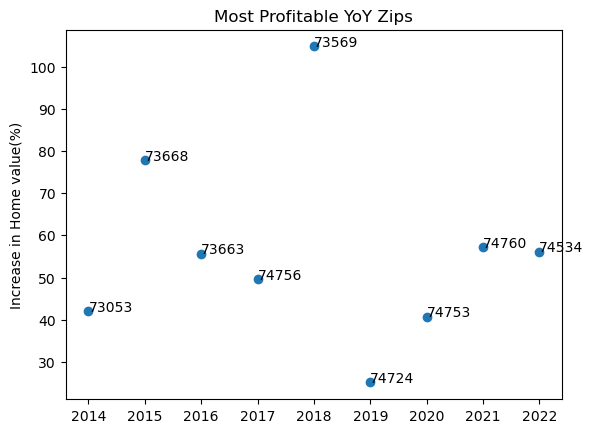

In [81]:

plt.scatter(max_returns_per_year['year'],max_returns_per_year['return'],marker='o',linestyle='-')

plt.title('Most Profitable YoY Zips')
plt.ylabel('Increase in Home value(%)')

for index, row in max_returns_per_year.iterrows():
    plt.annotate(row['zip'], (row['year'], row['return']))

plt.show()
    

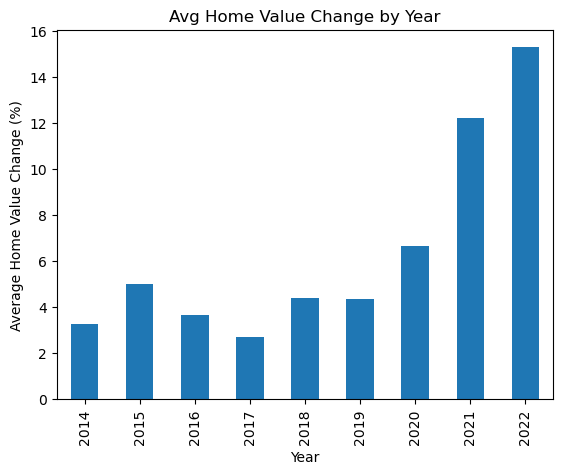

In [61]:
# Average change for Oklahoma by year
home_value_diff_by_zip.mean().plot(kind='bar',title='Avg Home Value Change by Year')
plt.xlabel('Year')
plt.ylabel('Average Home Value Change (%)')
plt.show()